# 單元5 迴歸法預測函數

我們認真的來做一下數據分析!

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 5-1 小試線性迴歸

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 50 個點

In [2]:
x = np.linspace(0, 5, 50)

In [3]:
y = 1.2*x + 0.8

畫出圖形來。

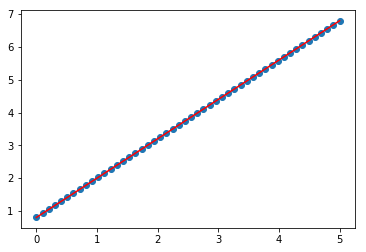

In [4]:
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

#### 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [5]:
y = 1.2*x + 0.8 + 0.3*np.random.randn(50)

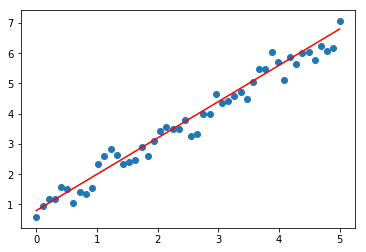

In [6]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

#### 做線性迴歸找出那條線

做線性迴歸有很多套件, 但我們這裡用 `sklearn.svm` 裡的 `SVR` 來做各種迴歸。

In [7]:
from sklearn.linear_model import LinearRegression

### 【重點】開一台「線性迴歸機」

In [8]:
regr = LinearRegression()

### 【重點】注意輸入格式

In [9]:
X = x.reshape(len(x),1)

In [10]:
regr.fit(X,y)

/Users/mac/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
Y = regr.predict(X)

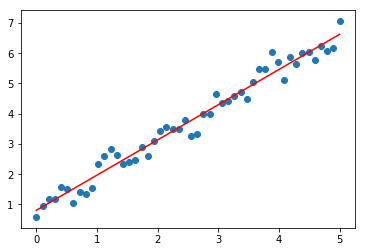

In [12]:
plt.scatter(x, y)
plt.plot(x, Y, 'r')

## 5-2 標準函數訓練及測試

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.cross_validation
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

In [13]:
from sklearn.model_selection import train_test_split

把原來的 `x`, `y` 中的 80% 給 training data, 20% 給 testing data。

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

我們在「訓練」這個函數時只有以下這些資料。

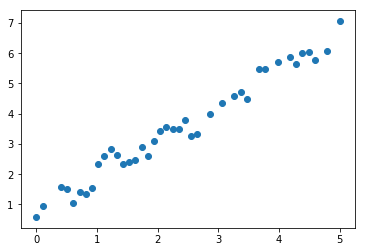

In [15]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [16]:
regr = LinearRegression()
X_train = x_train.reshape(len(x_train),1)
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
Y_train = regr.predict(X_train)

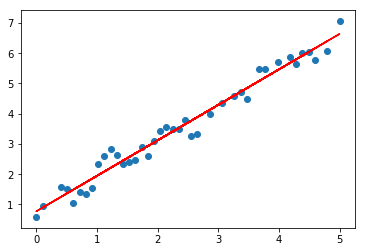

In [18]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')

#### 用測試資料試試我們預測準不準

In [19]:
X_test = x_test.reshape(len(x_test),1)

In [20]:
Y_test = regr.predict(X_test)

In [21]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)

In [22]:
mse

0.10521166699425051

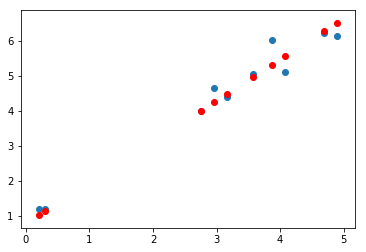

In [23]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, Y_test, c='r')

## 5-3 股票預測

我們快速的把上次的資料找回來做預測...

In [26]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [27]:
df = df[-300:]

adj_close = df.Close.values

X = adj_close[:-1].reshape(299,1)
Y = adj_close[1:]

#### 訓練資料、測試資料

In [28]:
x_train = X[:-40]
x_test = X[-40:]
y_train = Y[:-40]
y_test = Y[-40:]

#### 開台「迴歸機」

In [29]:
regr = LinearRegression()

regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 預測

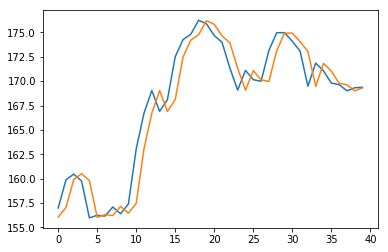

In [30]:
plt.plot(y_test)
plt.plot(regr.predict(x_test))

這看來有點怪...

#### 直接預測 40 天!

In [31]:
x0 = x_test[0]
y_predict = np.array([])

for i in range(40):
    y0 = regr.predict([x0])
    y_predict = np.append(y_predict, y0)
    x0 = y0

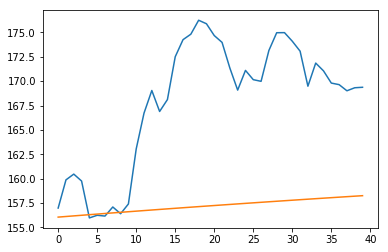

In [32]:
plt.plot(y_test)
plt.plot(y_predict)

這也差太遠!!

## 5-4 房價預測

#### 讀入資料

SciKit-Learn 有許多 "Toy Datasets" 可以讓我們玩玩。

今天我們要使用的是「波士頓房價資料」。

In [33]:
from sklearn.datasets import load_boston
boston = load_boston()

#### 閱讀數據庫說明

我們可以用

    print(boston.DESCR)
    
來看看說明。也可以用

    boston.feature_names
    
看看 features 的名稱。

In [34]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

#### 訓練資料

In [35]:
X = boston.data
Y = boston.target

#### 區分訓練資料、測試資料

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   random_state=87)

In [37]:
x_train[0]

array([  6.04700000e-02,   0.00000000e+00,   2.46000000e+00,
         0.00000000e+00,   4.88000000e-01,   6.15300000e+00,
         6.88000000e+01,   3.27970000e+00,   3.00000000e+00,
         1.93000000e+02,   1.78000000e+01,   3.87110000e+02,
         1.31500000e+01])

#### 開個分類機、訓練

In [38]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 預測、看結果

In [39]:
y_predict = regr.predict(x_test)

Text(0,0.5,'Predicted Price')

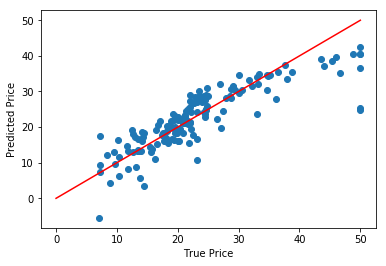

In [40]:
plt.scatter(y_test, y_predict)
plt.plot([0,50],[0,50],'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')